# KNN method  -- 3 classes

In [132]:
# import load_iris function from datasets module, getting iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
print type(iris)

# store feature matrix in "X", store response vector in "y"
X = iris.data
y = iris.target
print type(X), type(y)

# print the shapes of X and y
print X.shape
print y.shape
print X[:3]
print y

<class 'sklearn.datasets.base.Bunch'>
<type 'numpy.ndarray'> <type 'numpy.ndarray'>
(150L, 4L)
(150L,)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### we want to split the data into training set and testing set

In [133]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print X_train.shape,X_test.shape
print y_train.shape, y_test.shape

(112L, 4L) (38L, 4L)
(112L,) (38L,)


### 1. KNN METHOD WITH K = 3 

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [135]:
# "Instantiate" the "estimator"
knn = KNeighborsClassifier(n_neighbors=3)  ### here we can use a different value of k
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [136]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.973684210526


### confusion matrix

In [137]:
# IMPORTANT: first argument is true values, second argument is predicted values
confusion = metrics.confusion_matrix(y_test, y_pred)
print confusion
print type(confusion)
print confusion.shape

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]
<type 'numpy.ndarray'>
(3L, 3L)


#### KNN method tune the perameter K

In [138]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print scores

[0.94736842105263153, 0.94736842105263153, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582, 0.94736842105263153, 0.97368421052631582, 0.94736842105263153, 0.97368421052631582, 0.97368421052631582, 0.97368421052631582]


#### ploting the accuracy rate

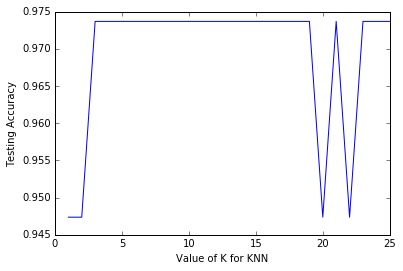

In [139]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### 2. 10 fold Cross Validation- KNN METHOD WITH K = 3

In [140]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print scores

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 1.          1.          0.90909091  0.90909091  0.90909091  1.          1.
  1.          1.          1.        ]
0.972727272727


#### KNN method tune the perameter K

In [141]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        ### notice that there we use cross_vval_score() function to calculate the accuracy. 
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


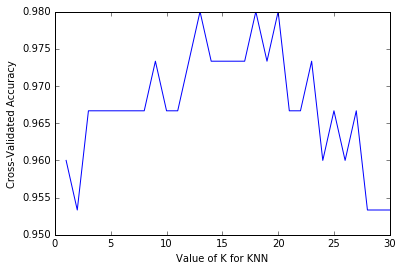

In [142]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## 3.  `GridSearchCV` -- parameter tuning

In [143]:
from sklearn.grid_search import GridSearchCV

# define the parameter values that should be searched
k_range = range(1, 31)
print k_range

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

# instantiate the grid ---  knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

# view the complete results (list of named tuples)
grid.grid_scores_

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


[mean: 0.96429, std: 0.04299, params: {'n_neighbors': 1},
 mean: 0.95536, std: 0.04423, params: {'n_neighbors': 2},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 3},
 mean: 0.96429, std: 0.04299, params: {'n_neighbors': 4},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 5},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 6},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 7},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 8},
 mean: 0.98214, std: 0.03636, params: {'n_neighbors': 9},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 10},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 11},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 12},
 mean: 0.99107, std: 0.02727, params: {'n_neighbors': 13},
 mean: 0.97321, std: 0.04166, params: {'n_neighbors': 14},
 mean: 0.96429, std: 0.06030, params: {'n_neighbors': 15},
 mean: 0.96429, std: 0.06030, params: {'n_neighbors': 16},
 mean: 0.96429, std: 0.06030, params: {'n_neighbors': 17},
 mean:

In [144]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

{'n_neighbors': 1}
[ 1.          0.92307692  0.90909091  0.90909091  0.90909091  1.          1.
  1.          1.          1.        ]
0.964285714286
[0.9642857142857143, 0.9553571428571429, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9821428571428571, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9910714285714286, 0.9732142857142857, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9553571428571429, 0.9642857142857143, 0.9464285714285714, 0.9464285714285714, 0.9553571428571429, 0.9553571428571429, 0.9553571428571429, 0.9553571428571429, 0.9553571428571429, 0.9553571428571429, 0.9464285714285714, 0.9553571428571429, 0.9553571428571429]


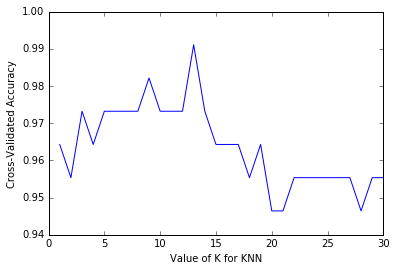

In [145]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Logistic regression -?? why here are 3 classes, using logistic reg??

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# predict the response values for the observations in X abd store the predicted response values
y_pred = logreg.predict(X_test)
print y_pred

# check how many predictions were generated
len(y_pred)

# compute classification accuracy for the logistic regression model
print metrics.accuracy_score(y_test, y_pred)

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 2 0 2 0 1 2 2
 1]
0.921052631579


#### confusion matrix

In [147]:
# IMPORTANT: first argument is true values, second argument is predicted values
print metrics.confusion_matrix(y_test, y_pred)

[[18  0  0]
 [ 0  6  2]
 [ 0  1 11]]


#### 10 fold cross-validation

In [185]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print scores, '\n'

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 1.          1.          0.90909091  1.          0.90909091  1.          1.
  0.90909091  1.          0.9       ] 

0.962727272727


# Decision Tree Method

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [170]:
y_pred = dt.predict(X_test)
print y_pred,'\n'

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print confusion,'\n'

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1] 

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]] 

0.973684210526


#### 10 fold cross-validation

In [187]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
print scores,'\n'

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 1.          0.92307692  0.81818182  1.          0.90909091  1.          1.
  1.          0.9         1.        ] 

0.955034965035


# Random Forest Method

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
y_pred = rf.predict(X_test)
print y_pred, '\n'

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print confusion,  '\n'

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

[2 0 2 2 2 1 1 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1] 

[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]] 

0.973684210526


#### 10 fold cross-validation

In [188]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print scores,'\n'

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 1.          0.92307692  0.81818182  0.90909091  0.90909091  0.90909091
  0.90909091  1.          1.          1.        ] 

0.937762237762


# Linear Discriminant Analysis (LDA)

In [191]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [192]:
y_pred = model.predict(X_test)
print y_pred,  '\n'

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print confusion,  '\n'

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1] 

[[18  0  0]
 [ 0  7  1]
 [ 0  1 11]] 

0.947368421053


#### 10 fold cross-validation

In [193]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation
model = LinearDiscriminantAnalysis()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print scores,'\n'

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 1.          1.          1.          1.          0.90909091  1.          1.
  1.          1.          1.        ] 

0.990909090909


# Quadratic Discriminant Analysis (QDA)

In [194]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [195]:
y_pred = model.predict(X_test)
print y_pred,  '\n'

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print confusion,  '\n'

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 2 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1] 

[[18  0  0]
 [ 0  6  2]
 [ 0  1 11]] 

0.921052631579


#### 10 fold cross-validation

In [196]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation
model = LinearDiscriminantAnalysis()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print scores,'\n'

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 1.          1.          1.          1.          0.90909091  1.          1.
  1.          1.          1.        ] 

0.990909090909
